In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

# Importing Data

Data was scraped from the Amazon website for Charge 3

In [2]:
df = pd.read_csv('charge3.csv', parse_dates =['date'])

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,review_link,review_link-href,name,date,stars,stars-href,verified,product,review
0,1561419967-3818,https://www.amazon.com/Fitbit-Fitness-Activity...,Buy Something Else,https://www.amazon.com/gp/customer-reviews/R2N...,Ivan Hysell,2019-04-06,1.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R2N...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,Not reliable. This is my second attempt at thi...
1,1561421400-4151,https://www.amazon.com/Fitbit-Fitness-Activity...,inacurate heartrate and tracking,https://www.amazon.com/gp/customer-reviews/R2E...,Emily P.,2019-04-24,1.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R2E...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,The heart rate tracker is mostly why I bought ...
2,1561416358-2690,https://www.amazon.com/Fitbit-Fitness-Activity...,Amazing Quick Shipping to Canada,https://www.amazon.com/gp/customer-reviews/R3D...,Amazon Customer,2018-12-14,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R3D...,Verified Purchase,Color: Rose Gold/Blue GreyEdition: Charge 3 Ac...,Great Service and Product
3,1561420798-4056,https://www.amazon.com/Fitbit-Fitness-Activity...,Great product... if it worked.,https://www.amazon.com/gp/customer-reviews/R2H...,Jerome,2019-04-24,1.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R2H...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,Only a few months into owning this product aft...
4,1561419495-3610,https://www.amazon.com/Fitbit-Fitness-Activity...,Don’t buy,https://www.amazon.com/gp/customer-reviews/RAG...,bwr,2018-12-06,1.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/RAG...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,"Worked great for about two months, then stoppe..."


In [4]:
df = df.drop(columns=['web-scraper-order','web-scraper-start-url'])

In [5]:
df['stars'] = df.stars.apply(lambda x: x.split(' ')[0])

In [6]:
df.head()

,review_link,review_link-href,name,date,stars,stars-href,verified,product,review
0,Buy Something Else,https://www.amazon.com/gp/customer-reviews/R2N...,Ivan Hysell,2019-04-06,1.0,https://www.amazon.com/gp/customer-reviews/R2N...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,Not reliable. This is my second attempt at thi...
1,inacurate heartrate and tracking,https://www.amazon.com/gp/customer-reviews/R2E...,Emily P.,2019-04-24,1.0,https://www.amazon.com/gp/customer-reviews/R2E...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,The heart rate tracker is mostly why I bought ...
2,Amazing Quick Shipping to Canada,https://www.amazon.com/gp/customer-reviews/R3D...,Amazon Customer,2018-12-14,5.0,https://www.amazon.com/gp/customer-reviews/R3D...,Verified Purchase,Color: Rose Gold/Blue GreyEdition: Charge 3 Ac...,Great Service and Product
3,Great product... if it worked.,https://www.amazon.com/gp/customer-reviews/R2H...,Jerome,2019-04-24,1.0,https://www.amazon.com/gp/customer-reviews/R2H...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,Only a few months into owning this product aft...
4,Don’t buy,https://www.amazon.com/gp/customer-reviews/RAG...,bwr,2018-12-06,1.0,https://www.amazon.com/gp/customer-reviews/RAG...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,"Worked great for about two months, then stoppe..."


In [7]:
df['length'] = df.review.apply(lambda x: len(x))

In [8]:
df['year'] = df.date.apply(lambda x: x.year)

In [9]:
df['stars'] = pd.to_numeric(df.stars)

In [10]:
df.head()

,review_link,review_link-href,name,date,stars,stars-href,verified,product,review,length,year
0,Buy Something Else,https://www.amazon.com/gp/customer-reviews/R2N...,Ivan Hysell,2019-04-06,1.0,https://www.amazon.com/gp/customer-reviews/R2N...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,Not reliable. This is my second attempt at thi...,496,2019
1,inacurate heartrate and tracking,https://www.amazon.com/gp/customer-reviews/R2E...,Emily P.,2019-04-24,1.0,https://www.amazon.com/gp/customer-reviews/R2E...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,The heart rate tracker is mostly why I bought ...,446,2019
2,Amazing Quick Shipping to Canada,https://www.amazon.com/gp/customer-reviews/R3D...,Amazon Customer,2018-12-14,5.0,https://www.amazon.com/gp/customer-reviews/R3D...,Verified Purchase,Color: Rose Gold/Blue GreyEdition: Charge 3 Ac...,Great Service and Product,25,2018
3,Great product... if it worked.,https://www.amazon.com/gp/customer-reviews/R2H...,Jerome,2019-04-24,1.0,https://www.amazon.com/gp/customer-reviews/R2H...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,Only a few months into owning this product aft...,673,2019
4,Don’t buy,https://www.amazon.com/gp/customer-reviews/RAG...,bwr,2018-12-06,1.0,https://www.amazon.com/gp/customer-reviews/RAG...,Verified Purchase,Color: Graphite/BlackEdition: Charge 3 Activit...,"Worked great for about two months, then stoppe...",158,2018


(-20, 2000)

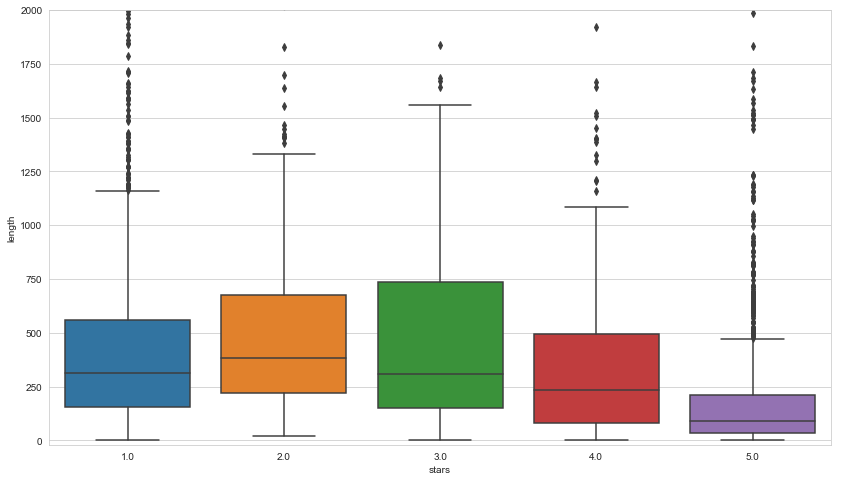

In [11]:
fig, ax = plt.subplots(figsize = (14,8))
sns.boxplot(df.stars, df.length)
plt.ylim(-20, 2000)

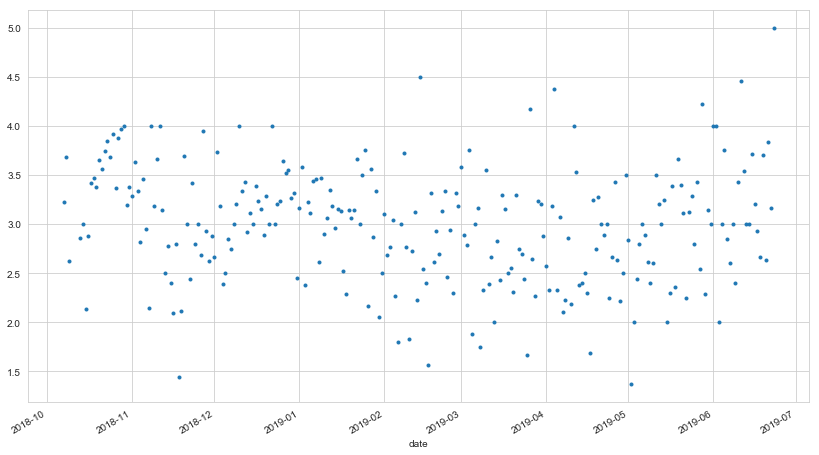

In [12]:
fig, ax = plt.subplots(figsize = (14,8))
df.groupby(['date'])['stars'].mean().plot(marker='.',linestyle='none')

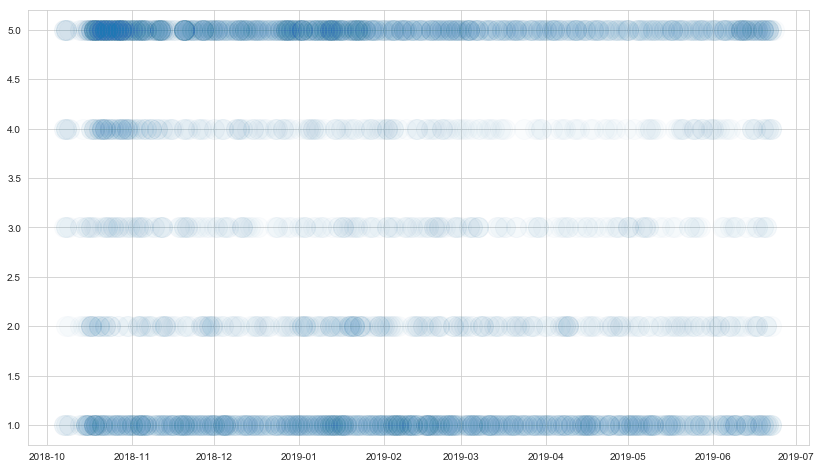

In [13]:
fig, ax = plt.subplots(figsize = (14,8))
plt.plot(df.date, df.stars, alpha=0.02, marker='.', linestyle='none', markersize=40)

Text(0.5, 1.0, 'Amazon Reviews for Fitbit Charge 3')

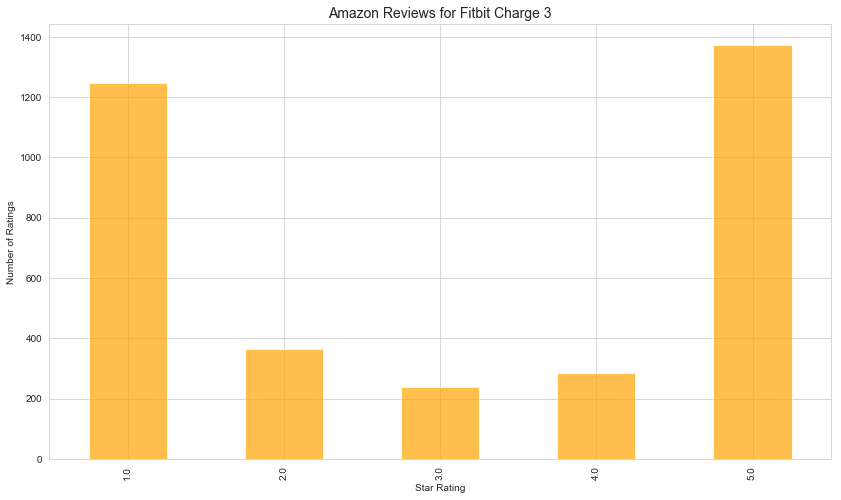

In [14]:
fig, ax = plt.subplots(figsize = (14,8))
df.groupby('stars').size().plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.title('Amazon Reviews for Fitbit Charge 3', fontsize=14)

# NLP

In [15]:
import gensim
import spacy
from nltk import FreqDist
from gensim.models import LdaModel, phrases
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now

# SpaCy

In [16]:
#$ python -m spacy download en_core_web_md (run in shell if not installed)
nlp = spacy.load('en_core_web_lg')

In [17]:
text = df.review[3]
print(text)

Only a few months into owning this product after the first week it stopped syncing completely and after all the troubleshooting steps taken by myself and afterwards using help from their support it was time for a replacement. New one came in and it's been over a month and everything seemed fine until it stopped charging. It doesn't recognize the charger even though the dead one (they didn't require me to send it back) did and even after attempting to reset it (couldn't even get it to restart) it's time for another replacement. I think it would be a great product as the design is solid and the intended use does work if the longevity of it was more than a few months.


In [18]:
# Process the text
doc = nlp(text)

In [19]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_lem = token.lemma_
    token_pos = token.pos_
    token_dep = token.dep_
    print('{:<12}{:<10}{:<10}{:<10}'.format(token_text, token_lem, token_pos, token_dep))

Only        only      ADV       advmod    
a           a         DET       quantmod  
few         few       ADJ       amod      
months      month     NOUN      npadvmod  
into        into      ADP       prep      
owning      own       VERB      pcomp     
this        this      DET       det       
product     product   NOUN      dobj      
after       after     ADP       prep      
the         the       DET       det       
first       first     ADJ       amod      
week        week      NOUN      pobj      
it          -PRON-    PRON      nsubj     
stopped     stop      VERB      ROOT      
syncing     sync      VERB      xcomp     
completely  completelyADV       advmod    
and         and       CCONJ     cc        
after       after     ADP       prep      
all         all       ADJ       predet    
the         the       DET       det       
troubleshootingtroubleshootingNOUN      compound  
steps       step      NOUN      pobj      
taken       take      VERB      acl       
by 

In [20]:
from spacy import displacy

# In[2]:
doc = nlp(u"i am very disapointed especially about the heart rate tracker")
displacy.render(doc, style="dep", jupyter=True, options={'distance':90})

In [21]:
from spacy.matcher import PhraseMatcher

In [22]:
def phrase_matcher(review): 
    matched_list = []
    matcher = PhraseMatcher(nlp.vocab)
    terms = [u"heart rate", u"gps", u"sync", u"syncing", u"design",
             u"charging", u"charger", u"battery", u"quality", 
             u"screen", u"service", u"heart", u"sleep", u"alarm", u"reminder"]
    # Only run nlp.make_review to speed things up
    patterns = [nlp.make_doc(text) for text in terms]
    matcher.add("TerminologyList", None, *patterns)
    matches = matcher(review)
    for match_id, start, end in matches:
        span = review[start:end]
        matched_list.append(span.text)
    return list(set(matched_list))

# TextBlob

In [23]:
from textblob import TextBlob

In [24]:
TextBlob(text).sentiment

Sentiment(polarity=0.1335858585858586, subjectivity=0.386489898989899)

In [25]:
rev = TextBlob(text)
for sentence in rev.sentences:
    print(sentence)
    print(phrase_matcher(nlp(str(sentence))), sentence.sentiment[0], sentence.sentiment[1])
    print('-------------------------------------')

Only a few months into owning this product after the first week it stopped syncing completely and after all the troubleshooting steps taken by myself and afterwards using help from their support it was time for a replacement.
['syncing'] 0.0375 0.45833333333333337
-------------------------------------
New one came in and it's been over a month and everything seemed fine until it stopped charging.
['charging'] 0.2765151515151515 0.4772727272727273
-------------------------------------
It doesn't recognize the charger even though the dead one (they didn't require me to send it back) did and even after attempting to reset it (couldn't even get it to restart) it's time for another replacement.
['charger'] -0.1 0.2
-------------------------------------
I think it would be a great product as the design is solid and the intended use does work if the longevity of it was more than a few months.
['design'] 0.275 0.36250000000000004
-------------------------------------


# AFINN

In [26]:
from afinn import Afinn

af = Afinn()

In [27]:
for sentence in rev.sentences:
    print(sentence)
    print(af.score(str(sentence)))

Only a few months into owning this product after the first week it stopped syncing completely and after all the troubleshooting steps taken by myself and afterwards using help from their support it was time for a replacement.
3.0
New one came in and it's been over a month and everything seemed fine until it stopped charging.
1.0
It doesn't recognize the charger even though the dead one (they didn't require me to send it back) did and even after attempting to reset it (couldn't even get it to restart) it's time for another replacement.
-3.0
I think it would be a great product as the design is solid and the intended use does work if the longevity of it was more than a few months.
5.0


# NLTK

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dmitriykats/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
sentences = []
from nltk import tokenize
lines_list = tokenize.sent_tokenize(text)
sentences.extend(lines_list)
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Only a few months into owning this product after the first week it stopped syncing completely and after all the troubleshooting steps taken by myself and afterwards using help from their support it was time for a replacement.
compound: 0.6369, neg: 0.046, neu: 0.78, pos: 0.173, 
New one came in and it's been over a month and everything seemed fine until it stopped charging.
compound: -0.0258, neg: 0.102, neu: 0.802, pos: 0.096, 
It doesn't recognize the charger even though the dead one (they didn't require me to send it back) did and even after attempting to reset it (couldn't even get it to restart) it's time for another replacement.
compound: -0.6486, neg: 0.107, neu: 0.893, pos: 0.0, 
I think it would be a great product as the design is solid and the intended use does work if the longevity of it was more than a few months.
compound: 0.6908, neg: 0.0, neu: 0.814, pos: 0.186, 


# Phrase count in new DataFrame (TextBlob only)

In [31]:
#create a dataframe with our phrases as columns, to keep count of sentiment
phrase_df = pd.DataFrame(columns=[u"heart rate", u"gps", u"sync", u"syncing", u"design",
             u"charging", u"charger", u"battery", u"quality", 
             u"screen", u"service", u"heart", u"sleep", u"alarm", u"reminder"])

In [32]:
#need SpaCy lg dictionary and TextBlob

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    #create textblob object
    rev = TextBlob(review)
    
    for sentence in rev.sentences:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
    
        if sentence.sentiment[0] > 0.1:
            sentence_sentiment = 1
        elif sentence.sentiment[0] == 0 and sentence.sentiment[0] <= 0.1:
            sentence_sentiment = 0
        else:
            sentence_sentiment = -1
        
        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [33]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [34]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [35]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [36]:
new_df = df_concat.iloc[:, 12:]

In [37]:
new_df.head()

,heart rate,gps,sync,syncing,design,charging,charger,battery,quality,screen,service,heart,sleep,alarm,reminder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,-1.0,1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


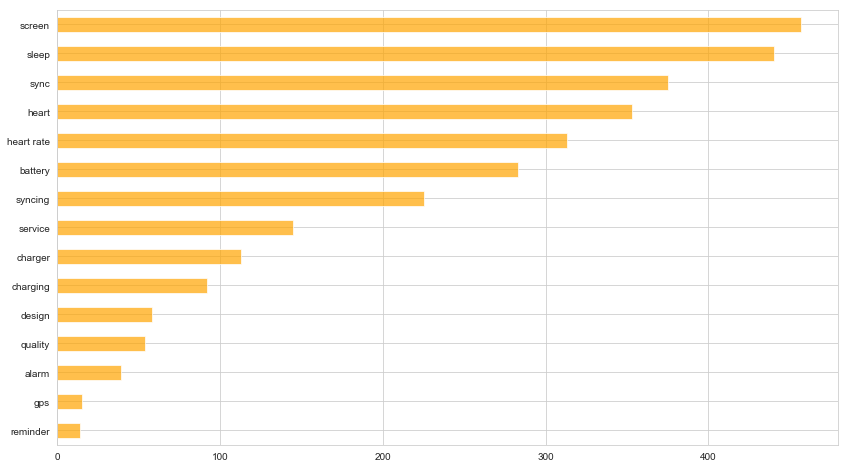

In [38]:
fig, ax = plt.subplots(figsize = (14,8))
new_df.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)

Text(0.5, 0, 'Count of Negative and Positive Comments')

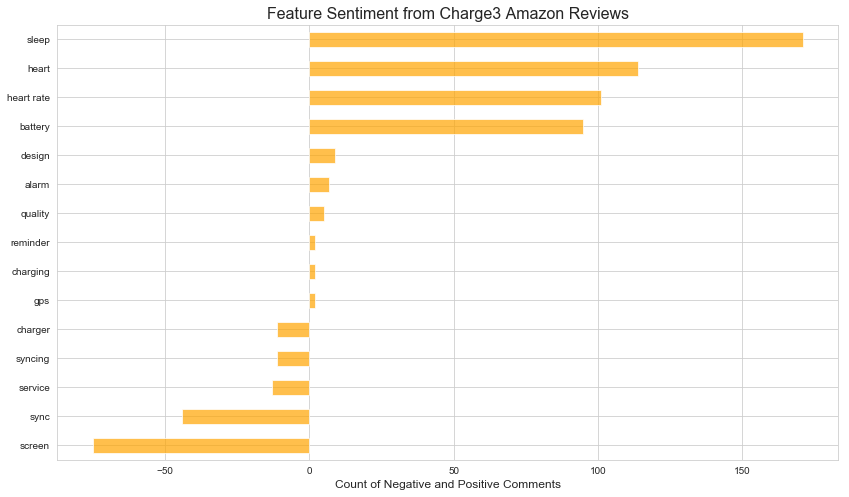

In [39]:
fig, ax = plt.subplots(figsize = (14,8))
new_df.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Charge3 Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

# Phrase count in new DataFrame (AFFIN only)

In [40]:
from afinn import Afinn
af = Afinn()

In [41]:
#need SpaCy lg dictionary and AFFIN

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    #create textblob object
    rev = TextBlob(review)
    
    for sentence in rev.sentences:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
    
        if af.score(str(sentence)) > 1:
            sentence_sentiment = 1
        elif af.score(str(sentence)) == 0 and af.score(str(sentence)) <= 1:
            sentence_sentiment = 0
        else:
            sentence_sentiment = -1
        
        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [42]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [43]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [44]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [45]:
new_df_afinn = df_concat.iloc[:, 12:]

In [46]:
new_df_afinn.head()

,heart rate,gps,sync,syncing,design,charging,charger,battery,quality,screen,service,heart,sleep,alarm,reminder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


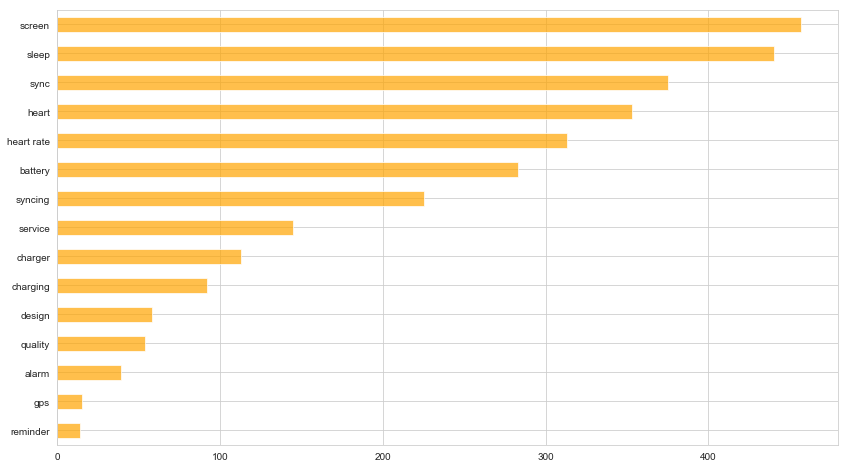

In [47]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_afinn.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)

Text(0.5, 0, 'Count of Negative and Positive Comments')

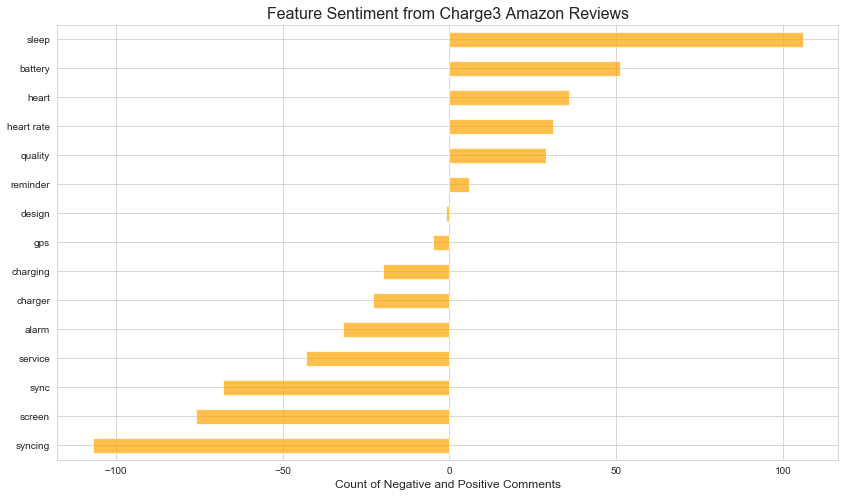

In [48]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_afinn.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Charge3 Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

# Phrase count in new DataFrame (NLTK only)

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dmitriykats/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
#need SpaCy lg dictionary 

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    #create textblob object
    rev = TextBlob(review)
    
    for sentence in rev.sentences:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
    
        if sid.polarity_scores(str(sentence)).get('compound') > 0.1:
            sentence_sentiment = 1
        elif sid.polarity_scores(str(sentence)).get('compound') == 0 \
            and sid.polarity_scores(str(sentence)).get('compound') <= 0.1:
            sentence_sentiment = 0
        else:
            sentence_sentiment = -1
        
        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [52]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [53]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [54]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [55]:
new_df_nltk = df_concat.iloc[:, 12:]

In [56]:
new_df_nltk.head()

,heart rate,gps,sync,syncing,design,charging,charger,battery,quality,screen,service,heart,sleep,alarm,reminder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


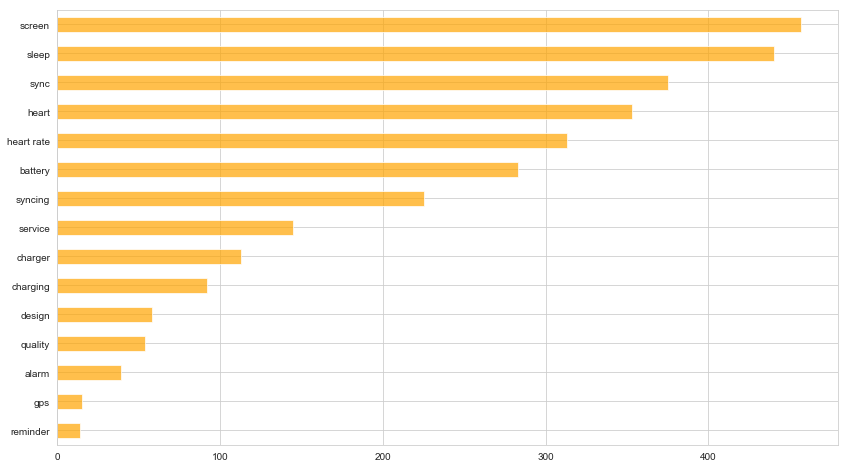

In [57]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_nltk.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)

Text(0.5, 0, 'Count of Negative and Positive Comments')

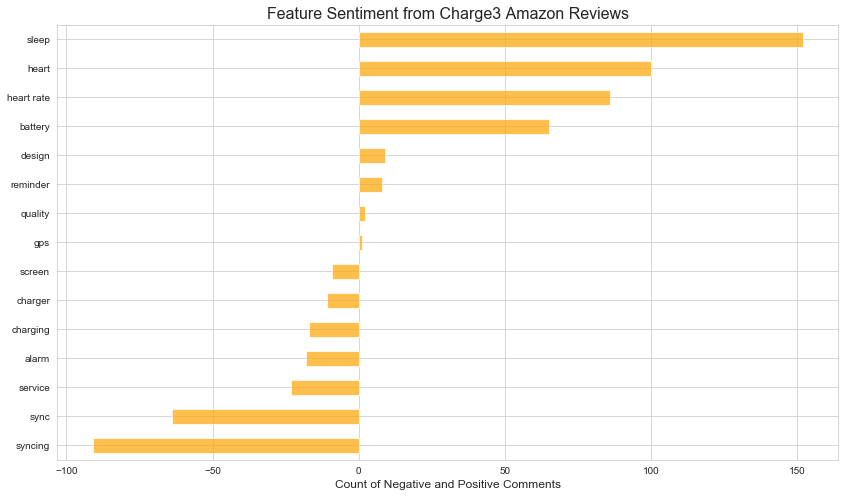

In [58]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_nltk.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Charge3 Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

# Averaged Model (NLTK, Afinn, TextBlob)

In [60]:
sum_df = (new_df_nltk + new_df_afinn + new_df).fillna(0) / 3

Text(0.5, 0, 'Count of Negative and Positive Comments')

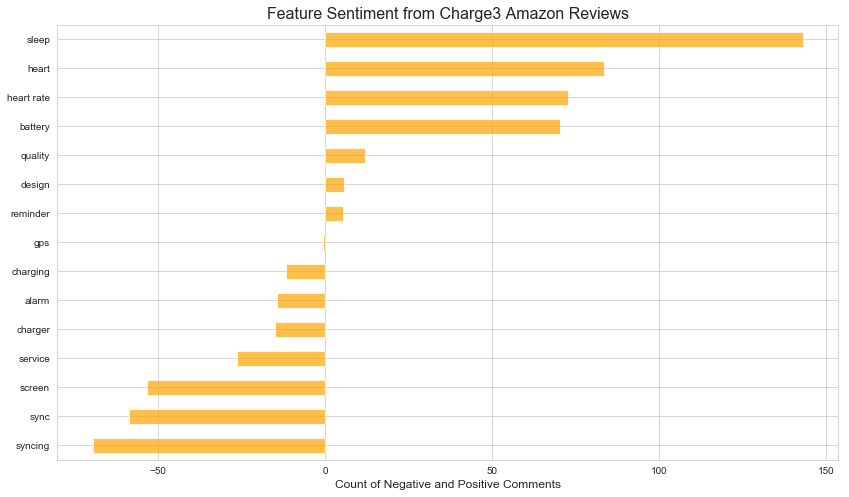

In [63]:
#Averaged 3 model score (TextBlob, Afinn, NLTK)
fig, ax = plt.subplots(figsize = (14,8))
sum_df.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Charge3 Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

In [ ]:
df['aspect_category'] = df.review.apply(lambda x: sorted(phrase_matcher(nlp(x))))

In [ ]:
df.head()

In [ ]:
df['aspect_cat_string'] = df.aspect_category.apply(lambda x: ', '.join(x))

In [ ]:
df['review'] = df.review.str.lower()

aspect_terms = []
for review in nlp.pipe(df.review):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    aspect_terms.append(' '.join(chunks))
df['aspect_terms'] = aspect_terms
df.head(5)

# Training Keras Deep Sentiment Model

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation

aspect_categories_model = Sequential()
aspect_categories_model.add(Dense(512, input_shape=(6000,), activation='relu'))
aspect_categories_model.add(Dense(205, activation='softmax'))
aspect_categories_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df.review)
aspect_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(df.aspect_terms))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(df.aspect_cat_string)
dummy_category = to_categorical(integer_category)

In [ ]:
aspect_categories_model.fit(aspect_tokenized, dummy_category, epochs=5, verbose=1)

In [ ]:
new_review = text

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_aspect_terms = ' '.join(chunks)
new_review_aspect_tokenized = tokenizer.texts_to_matrix([new_review_aspect_terms])

new_review_category = label_encoder.inverse_transform(aspect_categories_model.predict_classes(new_review_aspect_tokenized))
print(new_review_category)

In [ ]:
sentiment_terms = []
for review in nlp.pipe(df['review']):
        if review.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('')  
df['sentiment_terms'] = sentiment_terms
df.head()

In [ ]:
sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape=(6000,), activation='relu'))
sentiment_model.add(Dense(3, activation='softmax'))
sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
sentiment_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(df.sentiment_terms))

In [ ]:
def sentiment_return(rating):
    sentiment = 'positive'
    if rating == 3:
        sentiment = 'neutral'
    elif rating < 3:
        sentiment = 'negative'
    return sentiment

In [ ]:
df['sentiment'] = df.stars.apply(lambda x: sentiment_return(x))

In [ ]:
df.head()

In [ ]:
label_encoder_2 = LabelEncoder()
integer_sentiment = label_encoder_2.fit_transform(df.sentiment)
dummy_sentiment = to_categorical(integer_sentiment)

In [ ]:
sentiment_model.fit(sentiment_tokenized, dummy_sentiment, epochs=10, verbose=1)

In [ ]:
new_review = 'hate everything, and the watch does not work, sync is bad, sreen is dead'

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_aspect_terms = ' '.join(chunks)
new_review_aspect_tokenized = tokenizer.texts_to_matrix([new_review_aspect_terms])

new_review_category = label_encoder_2.inverse_transform(sentiment_model.predict_classes(new_review_aspect_tokenized))
print(new_review_category)

In [ ]:
test_reviews = [
    "customer support they tell me to restart the watch. The problem has not been fixed, i'm returing it. Also, the watch does not sync!",
    "Sreen went blank after 3 days. Fitbit stopped syncing after 2 days",
    "Customer service just kept telling me to restart the watch, but could not fix my sync problem. I can't return it. awful support."
]

# Aspect preprocessing
test_reviews = [review.lower() for review in test_reviews]
test_aspect_terms = []
for review in nlp.pipe(test_reviews):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    test_aspect_terms.append(' '.join(chunks))
test_aspect_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_aspect_terms))
                             
# Sentiment preprocessing
test_sentiment_terms = []
for review in nlp.pipe(test_reviews):
        if review.is_parsed:
            test_sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            test_sentiment_terms.append('') 
test_sentiment_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_sentiment_terms))

# Models output
test_aspect_categories = label_encoder.inverse_transform(aspect_categories_model.predict_classes(test_aspect_terms))
test_sentiment = label_encoder_2.inverse_transform(sentiment_model.predict_classes(test_sentiment_terms))
for i in range(3):
    print("Review " + str(i+1) + " is expressing a  " + test_sentiment[i] + " opinion about " + test_aspect_categories[i])